In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data_dir = Path('/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET')
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG36_2_1.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG7_3_2.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG26_2_1.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG10_2_3.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG4_2_2.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG35_3_1.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG25_3_1.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG13_3_3.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG12_1_4.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG27_2_4.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG37_2_4.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN DATA SET/RG/RG24_3_4.jpg
/Users/bengoel/Documents/GrainBoundaryDetection/GRAIN 

In [32]:
import tensorflow as tf
import os
import random
import numpy as np
import cv2
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


In [33]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [34]:
import os

# Set the directories containing the images and masks
image_dir = os.path.join(data_dir, 'RG')
mask_dir = os.path.join(data_dir, 'RGMask')

# Set the target image size
target_size = (IMG_WIDTH, IMG_HEIGHT)

# Create empty lists to hold the images and masks
images = []
masks = []

# Iterate through the directories and load the images and masks
for file in sorted(os.listdir(image_dir)):
    # Load the image and resize to the target size
    img = cv2.imread(os.path.join(image_dir, file))
    img = cv2.resize(img, target_size)
    
    # Append the resized image to the list of images
    images.append(img)
    
for file in sorted(os.listdir(mask_dir)):
    
    # Load the corresponding mask and resize to the target size
    #mask_file = file.replace('.jpg', '.png')
    mask = cv2.imread(os.path.join(mask_dir, file))
    mask = cv2.resize(mask, target_size)
    
    # Append the resized mask to the list of masks
    masks.append(mask)
    


In [35]:
image_x = random.randint(0, 300)
image_x

27

[[[0.08627451 0.16470588 0.1372549 ]
  [0.01176471 0.07058824 0.08627451]
  [0.08235294 0.12941176 0.18431373]
  ...
  [0.39607843 0.46666667 0.53333333]
  [0.41568627 0.49019608 0.54901961]
  [0.41176471 0.48627451 0.54509804]]

 [[0.34117647 0.43137255 0.45098039]
  [0.20392157 0.28627451 0.32941176]
  [0.16470588 0.23529412 0.30588235]
  ...
  [0.44705882 0.51764706 0.58431373]
  [0.43529412 0.50980392 0.56862745]
  [0.41960784 0.49411765 0.55294118]]

 [[0.50588235 0.61568627 0.68627451]
  [0.43529412 0.5372549  0.61176471]
  [0.30980392 0.41176471 0.49411765]
  ...
  [0.4627451  0.53333333 0.6       ]
  [0.45882353 0.53333333 0.59215686]
  [0.44313725 0.52156863 0.58039216]]

 ...

 [[0.55686275 0.63137255 0.74117647]
  [0.56470588 0.65098039 0.76078431]
  [0.54901961 0.64313725 0.74117647]
  ...
  [0.59215686 0.65882353 0.70980392]
  [0.47058824 0.55686275 0.6       ]
  [0.10588235 0.20392157 0.23921569]]

 [[0.57254902 0.65490196 0.74509804]
  [0.58823529 0.67058824 0.77647059]


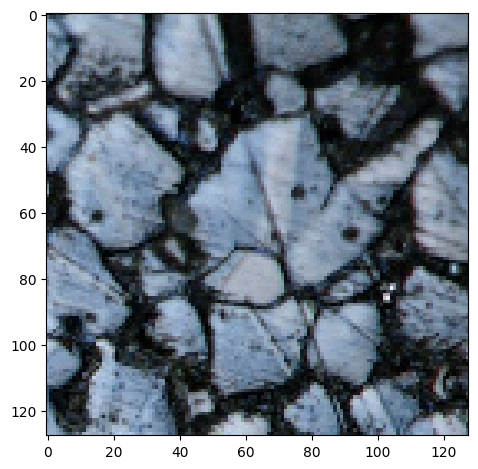

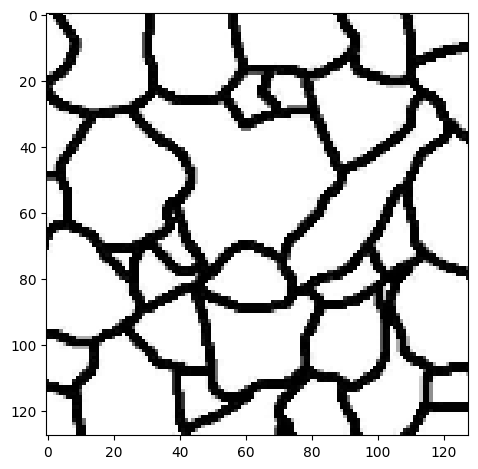

In [36]:

imshow(images[image_x])
print((images[image_x] / 255))
plt.show()
imshow(masks[image_x])
plt.show()


In [37]:
#Build the model

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda_1 (Lambda)           (None, 128, 128, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 16)         448       ['lambda_1[0][0]']            
                                                                                                  
 dropout_9 (Dropout)         (None, 128, 128, 16)         0         ['conv2d_19[0][0]']           
                                                                                            

In [38]:
# create the X and Y (input and output)

X_train = np.array(images)
Y_train = np.array(masks)

# change the Y to a boolean
Y_train = np.where(Y_train > 245, True, False)



In [41]:
#convert the boolean where it is true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimension RGB to just one boolean value

Y_t= np.any(Y_train, axis=-1)
Y_t = Y_t.reshape(480, 128, 128, 1)

In [42]:
################################

# create the checkpoint path

checkpoint_path = 'checkpoint_path/GrainsTraining.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)



#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_t, validation_split=0.1, batch_size=16, epochs=20, callbacks=callbacks)

####################################

Epoch 1/20
27/27 [==============================] - 18s 640ms/step - loss: 0.4874 - accuracy: 0.7440 - val_loss: 0.3998 - val_accuracy: 0.7966
Epoch 2/20
27/27 [==============================] - 17s 644ms/step - loss: 0.3942 - accuracy: 0.8084 - val_loss: 0.3728 - val_accuracy: 0.8171
Epoch 3/20
27/27 [==============================] - 17s 613ms/step - loss: 0.3771 - accuracy: 0.8173 - val_loss: 0.3601 - val_accuracy: 0.8246
Epoch 4/20
27/27 [==============================] - 19s 701ms/step - loss: 0.3654 - accuracy: 0.8240 - val_loss: 0.3436 - val_accuracy: 0.8346
Epoch 5/20
27/27 [==============================] - 14s 510ms/step - loss: 0.3480 - accuracy: 0.8336 - val_loss: 0.3290 - val_accuracy: 0.8435
Epoch 6/20
27/27 [==============================] - 14s 502ms/step - loss: 0.3336 - accuracy: 0.8413 - val_loss: 0.3175 - val_accuracy: 0.8489
Epoch 7/20
27/27 [==============================] - 14s 501ms/step - loss: 0.3250 - accuracy: 0.8456 - val_loss: 0.3085 - val_accuracy: 0.8526

In [43]:
####################################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
#preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
#preds_test_t = (preds_test > 0.5).astype(np.uint8)


2/2 [==============================] - 0s 136ms/step


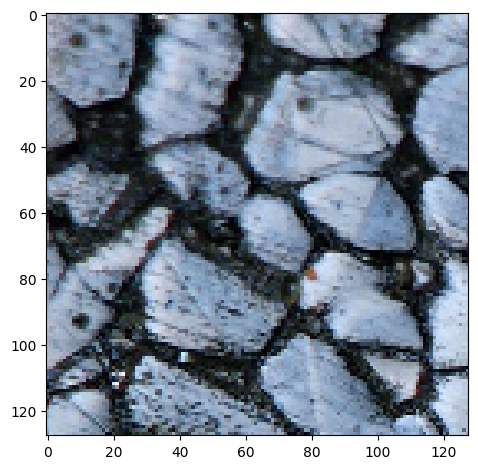

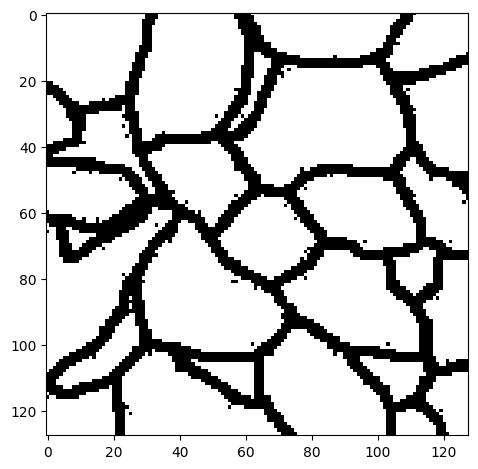

/Users/bengoel/anaconda3/envs/mse/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


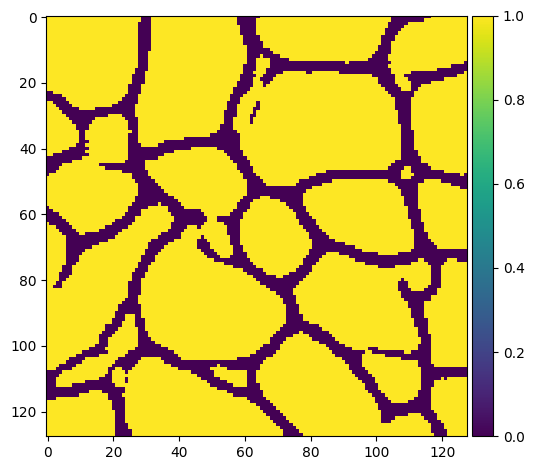

In [44]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_t[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

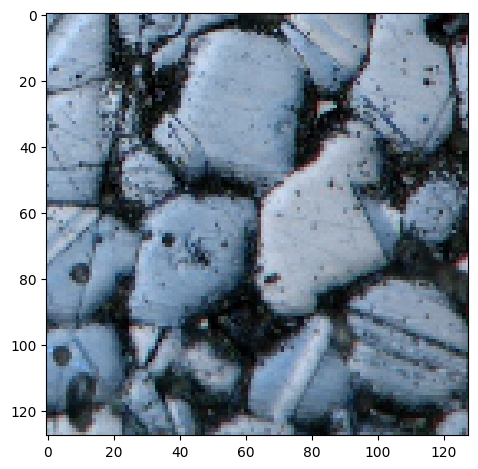

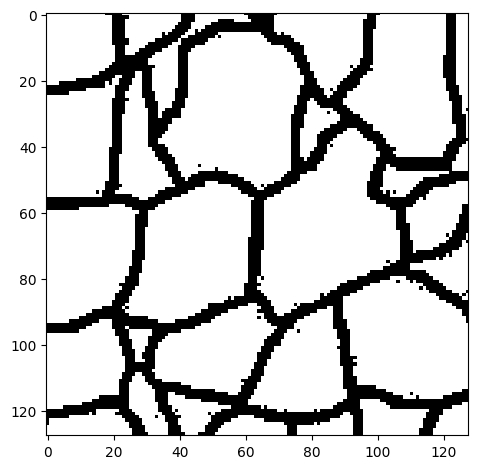

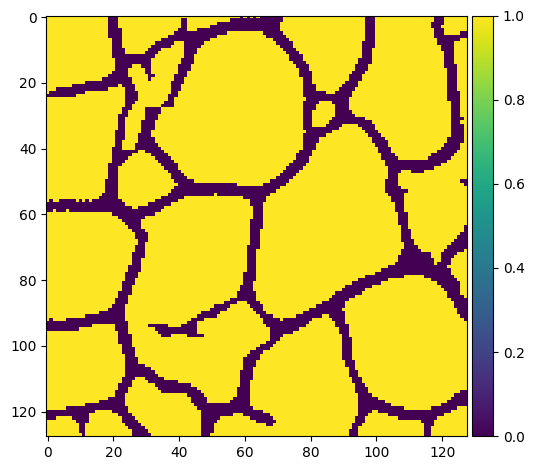

In [45]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_t[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()



In [46]:
model.save('Grains_DETECTION_UNET.h5')

/Users/bengoel/anaconda3/envs/mse/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
